In [1]:
import matplotlib.pyplot as plt
from skbio.stats.composition import clr, centralize, multiplicative_replacement
import pandas as pd
import numpy as np
import seaborn as sns
import os
from gneiss.util import match
%matplotlib inline

In [2]:
data_dir = '../data/'
metadata_fname = os.path.join(data_dir, 'potato_metadata.txt')
# selected molecules
targeted_fname = os.path.join(data_dir, 'ft-w-targets-only.txt')
# all of the molecules
untargeted_fname = os.path.join(data_dir, 'ft-w-gnpsid-norm.txt')

metadata = pd.read_table(metadata_fname, index_col=0)
targeted_df = pd.read_table(targeted_fname, index_col=0).T
untargeted_df = pd.read_table(untargeted_fname, index_col=0, skiprows=1).T

In [3]:
norm_targeted_df = pd.DataFrame(clr(centralize(multiplicative_replacement(targeted_df))),
                                index=targeted_df.index, 
                                columns=targeted_df.columns)
norm_untargeted_df = pd.DataFrame(clr(centralize(multiplicative_replacement(untargeted_df))),
                                  index=untargeted_df.index, 
                                 columns=untargeted_df.columns)

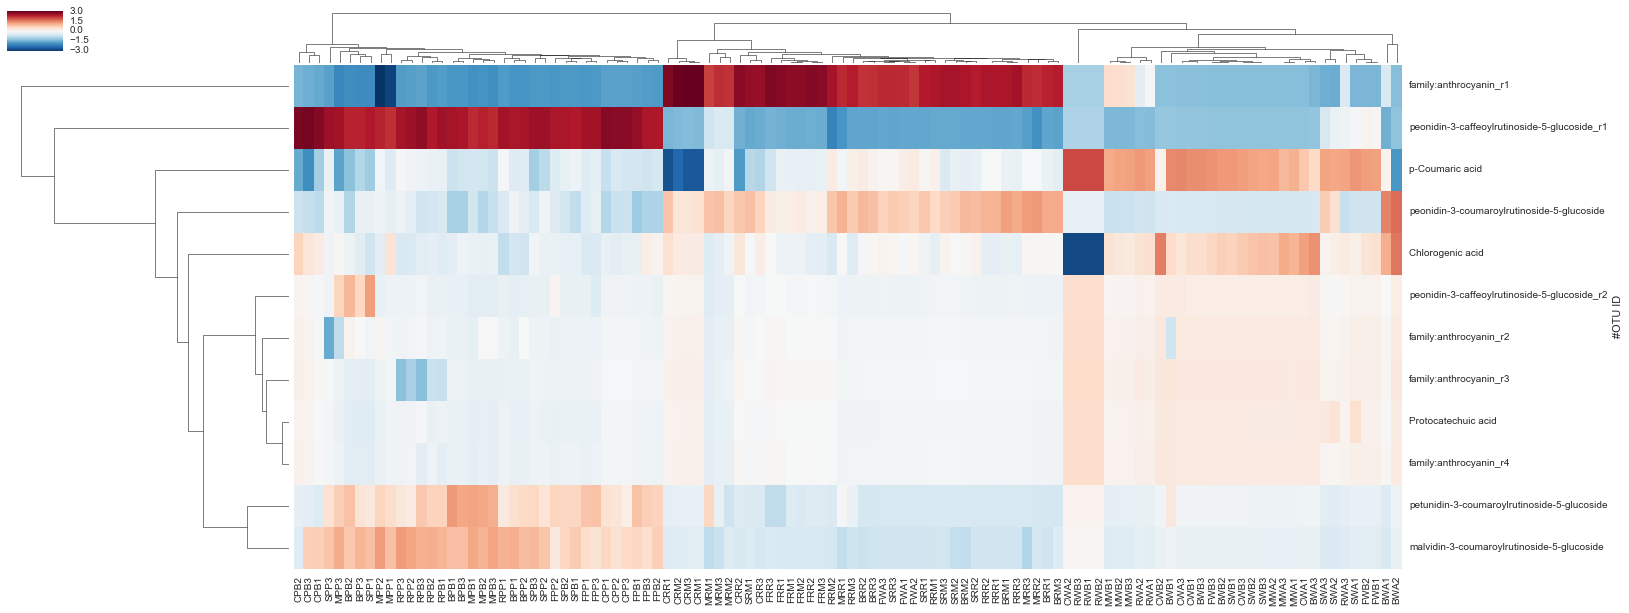

In [4]:
fig = sns.clustermap(norm_targeted_df.T, figsize=(25, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
fig.savefig('../results/targeted_heatmap.pdf')
#fig.ax_heatmap.set_yticklabels(rotation=0)

In [6]:
pmeta = metadata.loc[metadata.cultivar_color=='Purple']
ptable, pmetadata = match(targeted_df, pmeta)
norm_ptable = pd.DataFrame(clr(centralize(multiplicative_replacement(ptable))),
                           index=ptable.index, 
                           columns=ptable.columns)


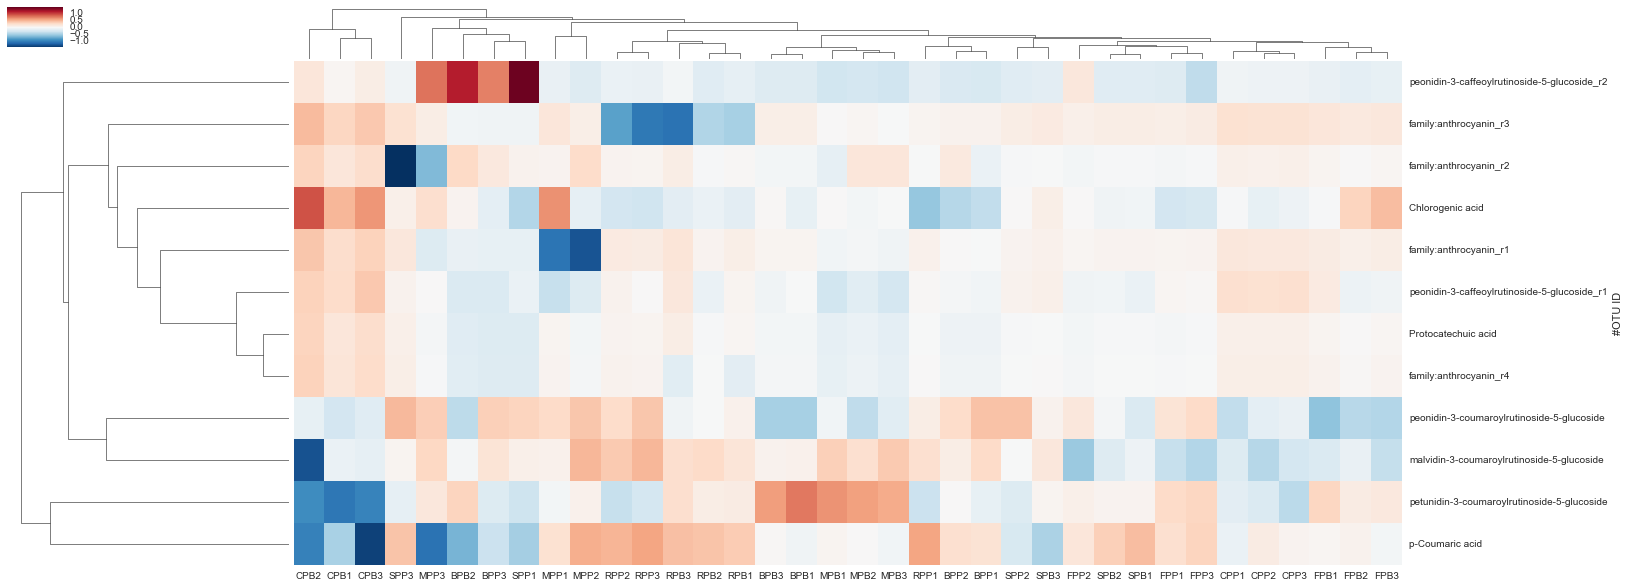

In [7]:
fig = sns.clustermap(norm_ptable.T, figsize=(25, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
fig.savefig('../results/purple_targeted_heatmap.pdf')
#fig.ax_heatmap.set_yticklabels(rotation=0)

In [ ]:
ptable